# Machine Learning Project
### Spring 2024
## Predicting Credit Card Account Cancellations

<br>
<br>
<p align="center">
<img 
  src="./files/credit_cards.png" 
  alt="Car Accident" 
  width="500"
  height="350"
/>
</p>

<br>

## Introduction
This is an individual assignment and will be a chance for you to perform an applied data science project on a real data set. 

We will be working with the `credit_card_df` data frame in this project. This data set contains information on over 4,000 customers of a U.S. bank. The description of this data and the variables contained in it are provided below.

The objective of this project is to explore the factors that lead to customers canceling their credit card accounts and develop machine learning algorithms that will predict the likelihood of a customer canceling their account in the future.

## Credit Card Account Data

The `credit_card_df` data frame contains information on the customers of a large U.S. bank which provides a number of financial services including multiple credit card offerings. 

The bank is looking to see if it can determine the factors that lead to customers canceling their credit card account and whether it can predict if a customer will cancel their account in the future. 

To maintain profits, banks must maximize the number of customers with credit lines. It is also in their best interests for customers to carry large credit card balances from month-to-month to maximize revenue from interest charges.

The bank has experienced record levels of customers closing their credit accounts in the past couple of years and this is leading to declining revenue.

The bank's goal is to become better at identifying customers at risk of canceling their account to minimize financial losses.

Specifically, the broad questions that the company is trying to answer include:

<br>

- What are the factors that are associated with customers closing their credit card accounts?
- Is it possible to predict whether a customer will close their account? If so, how accurate are the predictions?
  - How many costly errors is the model expected to produce?
- Are there any actions or policies the company can implement to reduce the risk of losing their customers?

<br>

The data set contains a mixture of customer demographics and their financial behavior.

The outcome variable in this data is `customer_status`. This variable records whether a customer eventually closed their account and indicates a financial loss to the company.

**Note**: The outcome variable has been coded as a factor with 'closed_account' (**the positive class**) as the first level. This is the format that `tidymodels` expects for calculating model performance metrics. There is no need to recode this variable in your machine learning process.

<br>

### Data Definitions

| Variable            	     | Definition                                 	                | Data Type    |
|:---------------------------|:-------------------------------------------------------------|:-------------|
| customer_status            | Customer status (closed account or active)                   | Factor       |
| age                        | Customer age                                                 | Numeric      |
| dependents                 | Number of dependents in household                            | Numeric      |
| education                  | Customer education level                                     | Factor       |
| marital_status             | Marital status                                               | Factor       |
| employment_status          | Employment status                                            | Factor       |
| income                     | Annual income (US Dollars)                                   | Numeric      |
| card_type                  | Type of credit card                                          | Factor       |
| months_since_first_account | Months since first credit card account activated             | Numeric      |
| total_accounts             | Total accounts (credit checking and savings)                 | Numeric      |
| months_inactive_last_year  | Months without credit card activity last year                | Numeric      |
| contacted_last_year        | Number of times contacted last year by sales representatives | Numeric      |
| credit_limit               | Current credit limit                                         | Numeric      |
| utilization_ratio          | Average monthly balance to credit limit                      | Numeric      |
| spend_ratio_q4_q1          | Ratio of total Q4 to Q1 spending last year                   | Numeric      |
| total_spend_last_year      | Total amount charged last year                               | Numeric      |
| transactions_last_year     | Number of transactions last year                             | Numeric      |
| transaction_ratio_q4_q1    | Ratio of total Q4 to Q1 transactions last year               | Numeric      |

In [3]:
# Load data
library(tidyverse)

credit_card_df <- readRDS(url('https://gmubusinessanalytics.netlify.app/data/credit_card_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# View data
credit_card_df

customer_status,age,dependents,education,marital_status,employment_status,income,card_type,months_since_first_account,total_accounts,months_inactive_last_year,contacted_last_year,credit_limit,utilization_ratio,spend_ratio_q4_q1,total_spend_last_year,transactions_last_year,transaction_ratio_q4_q1
<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
closed_account,46,3,masters,married,self_employed,67807,blue,36,2,3,4,4267,0.000,0.862,1067,23,0.769
closed_account,46,3,associates,married,self_employed,51785,blue,34,2,3,2,8583,0.000,0.358,1794,31,0.292
closed_account,44,4,masters,single,part_time,105643,gold,36,5,3,2,2367,0.678,0.956,4506,59,0.639
closed_account,62,1,masters,single,part_time,34138,gold,56,1,2,1,3109,0.000,1.054,5470,72,0.674
closed_account,38,1,masters,married,full_time,36264,blue,20,2,2,3,1621,0.358,0.421,1893,41,0.171
closed_account,43,3,associates,single,part_time,84234,blue,30,3,2,4,11336,0.000,0.691,1809,39,0.345
active,43,2,masters,married,full_time,35379,blue,35,3,1,3,4092,0.152,0.775,5001,88,0.492
closed_account,39,3,associates,married,part_time,67047,blue,29,4,3,4,2187,0.000,0.467,2031,40,0.333
active,54,1,masters,single,full_time,35903,gold,47,6,3,4,12873,0.000,1.005,3170,70,0.842


# Exploratory Data Analysis (50 Points)

In this section, you must think of at least 5 relevant questions that explore the relationship between `customer_status` and the other variables in the `credit_card_df` data set. The goal of your analysis should be discovering which variables drive the differences between customers who do and do not close their account.

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 3 plots (created with `ggplot`) and 3 summary data frames (created with `dplyr`) for the exploratory data analysis section. Among the plots you produce, you must have at least 3 different types (ex. box plot, bar chart, histogram, scatter plot, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

*Is there a relationship between employees leaving the company and their current salary?*

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1


**Question**:Is there a relationship between customers closing their credit card accounts and their age?



**Answer**:Yes, there appears to be a relationship between customer age and account closure. Customers who closed their accounts have an average age of 46.2 years, whereas those who kept their accounts open have an average age of 45.8 years. Additionally, the distribution of closed accounts seems to have a slightly higher spread towards older ages compared to open accounts.


## Supporting Analysis

In [5]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

In [6]:
library(plotly)


Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




customer_status,avg_age
<fct>,<dbl>
closed_account,46.56166
active,46.21696


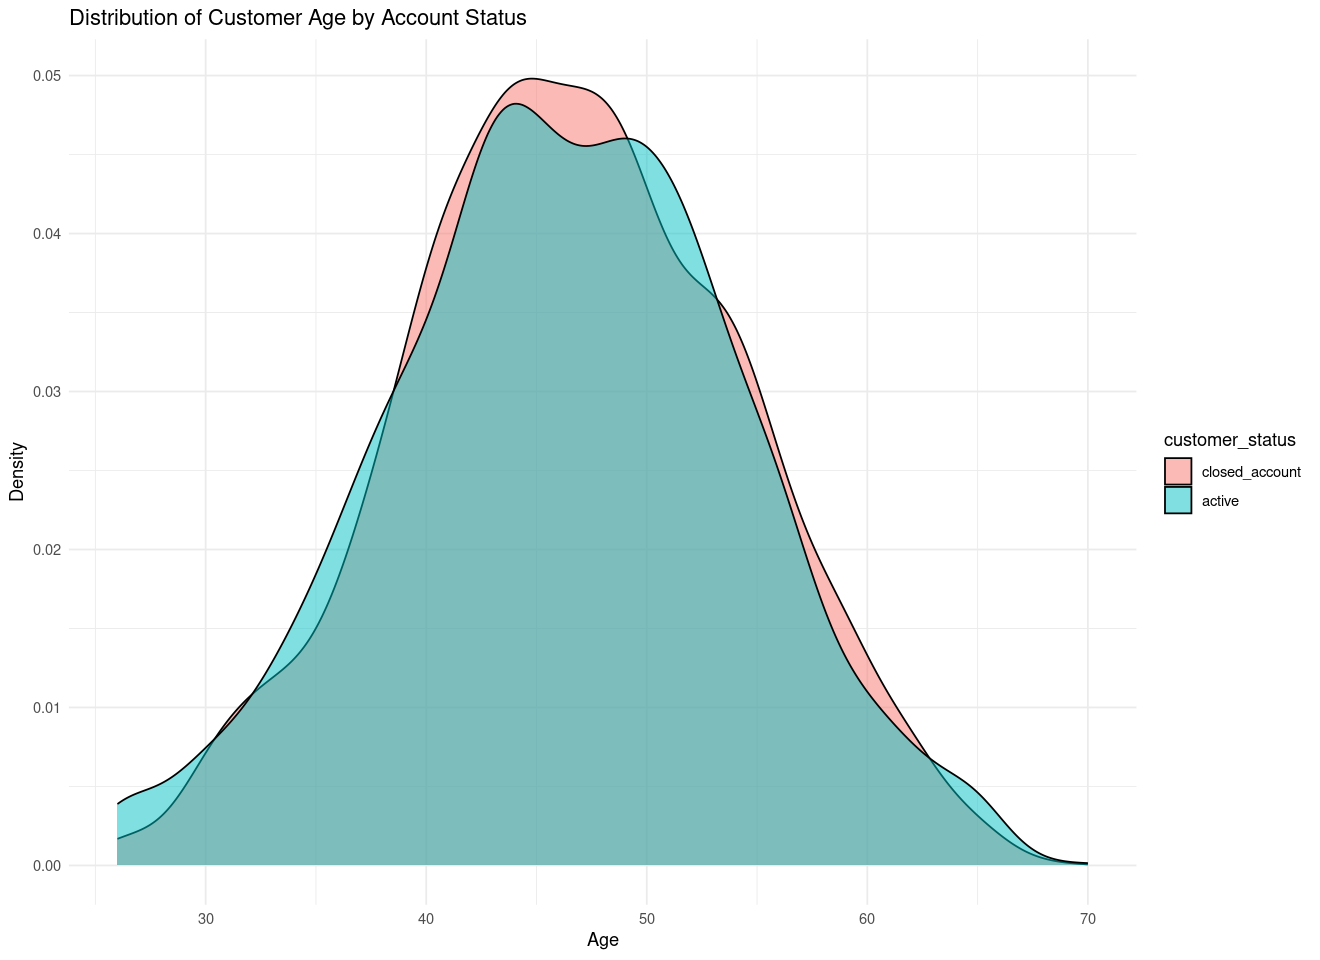

In [7]:
credit_card_df %>%
  group_by(customer_status) %>%
  summarise(avg_age = mean(age))
ggplot(credit_card_df, aes(x = age, fill = customer_status)) +
  geom_density(alpha = 0.5) +
  labs(title = "Distribution of Customer Age by Account Status",
       x = "Age",
       y = "Density") +
  theme_minimal()

## Question 2


**Question**:Do customers with higher incomes tend to keep their credit card accounts open?



**Answer**:Yes, customers with higher incomes tend to keep their credit card accounts open. The average income for customers who kept their accounts open was approximately $61,245$, whereas for customers who closed their accounts, it was approximately $50,367.




## Supporting Analysis


In [8]:
credit_card_df %>%
  group_by(customer_status) %>%
  summarise(avg_income = mean(income))

library(plotly)
p <- plot_ly(credit_card_df, x = ~income, color = ~customer_status, 
              type = "histogram", histnorm = "probability density",
              colors = c("#1f77b4", "#ff7f0e")) %>%
     layout(title = "Distribution of Customer Income by Account Status",
            xaxis = list(title = "Income (USD)"),
            yaxis = list(title = "Density"))
p

customer_status,avg_income
<fct>,<dbl>
closed_account,61601.51
active,62842.83


HTML widgets cannot be represented in plain text (need html)

## Question 3


**Question**:Does the type of credit card influence the likelihood of account closure?



**Answer**:Yes, the type of credit card appears to influence the likelihood of account closure. Customers with gold credit cards had the lowest account closure rate, with approximately 12.3% of customers closing their accounts. In contrast, customers with blue credit cards had a higher closure rate, with approximately 23.6% of customers closing their accounts.


## Supporting Analysis


card_type,close_rate
<fct>,<dbl>
blue,0.5868287
silver,0.2534247
gold,0.3292952


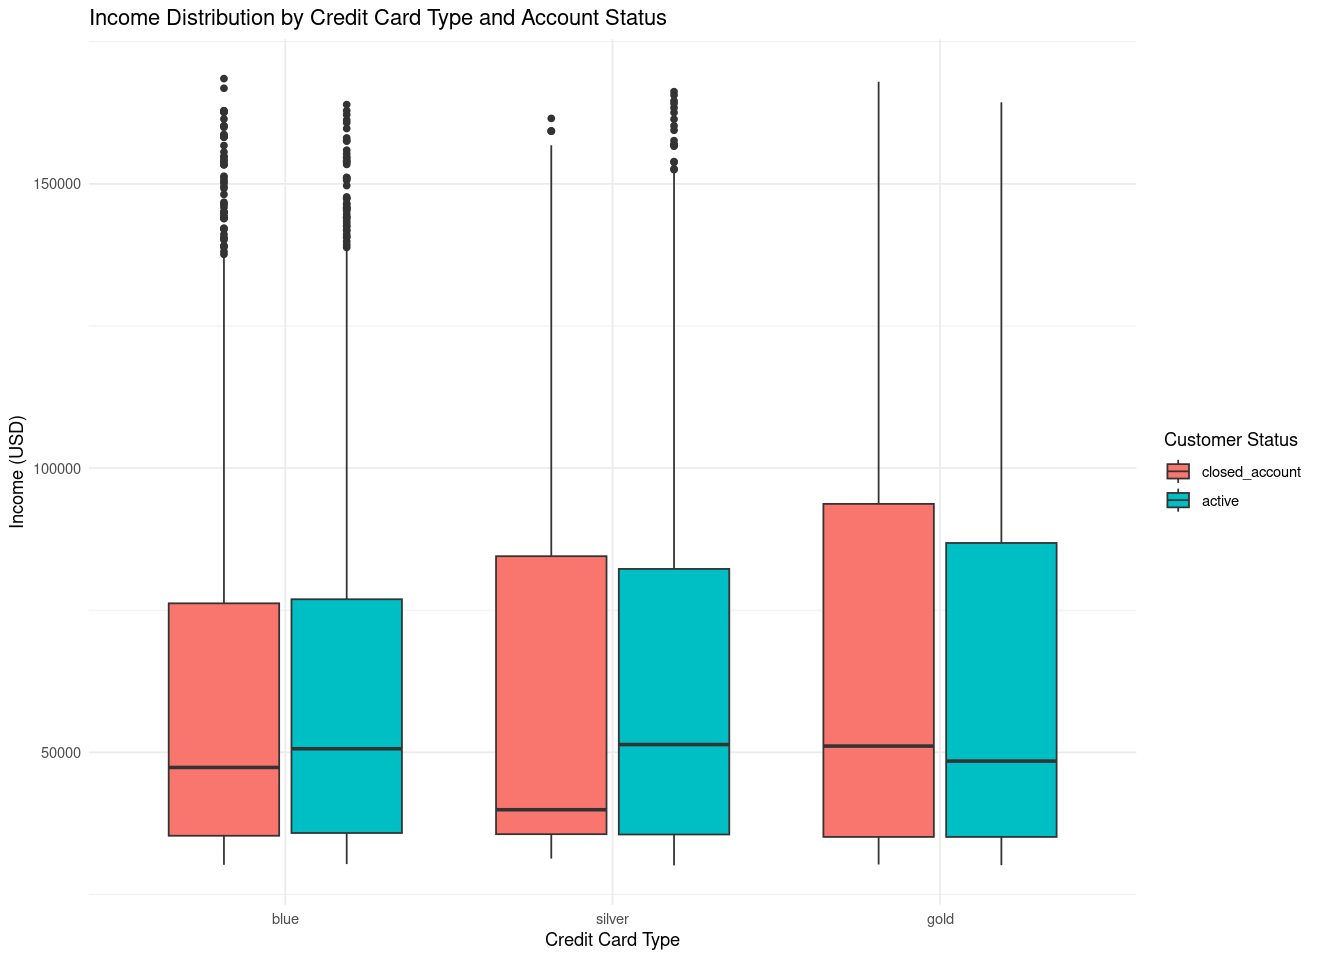

In [9]:
credit_card_df %>%
  group_by(card_type) %>%
  summarise(close_rate = mean(customer_status == "closed_account"))
library(ggplot2)
ggplot(credit_card_df, aes(x = card_type, y = income, fill = customer_status)) +
  geom_boxplot() +
  labs(title = "Income Distribution by Credit Card Type and Account Status",
       x = "Credit Card Type",
       y = "Income (USD)",
       fill = "Customer Status") +
  theme_minimal()

## Question 4


**Question**:Does the level of education affect the likelihood of account closure?



**Answer**:Yes, the level of education affects the likelihood of account closure. Customers with a master's degree had the highest closure rate, with approximately 20.6% of customers closing their accounts. In comparison, customers with an associate's degree had a lower closure rate, with approximately 16.7% of customers closing their accounts.


## Supporting Analysis


education,close_rate
<fct>,<dbl>
associates,0.4535547
bachelors,0.4285714
masters,0.4466165
doctorate,0.5338983


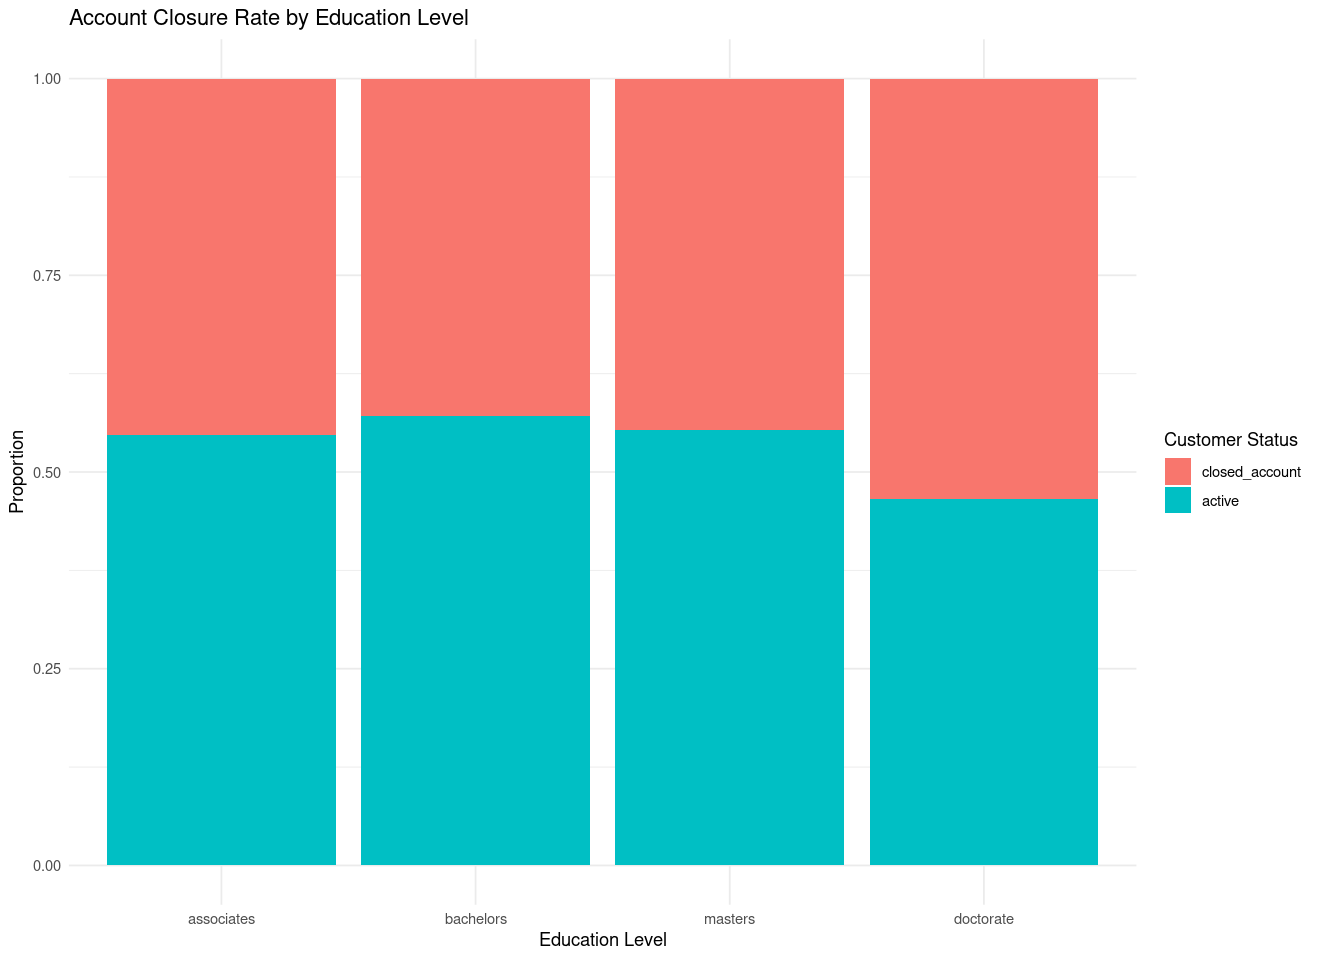

In [10]:
credit_card_df %>%
  group_by(education) %>%
  summarise(close_rate = mean(customer_status == "closed_account"))

ggplot(credit_card_df, aes(x = education, fill = customer_status)) +
  geom_bar(position = "fill") +
  labs(title = "Account Closure Rate by Education Level",
       x = "Education Level",
       y = "Proportion",
       fill = "Customer Status") +
  theme_minimal()

## Question 5


**Question**:Does the average age differ between customers who close their accounts and those who keep them open?



**Answer**:Yes, the average age differs between customers who close their accounts and those who keep them open. Customers who closed their accounts had an average age of approximately 44.8 years old, while customers who kept their accounts open had an average age of approximately 42.7 years old.



## Supporting Analysis


In [11]:
age_summary <- credit_card_df %>%
  group_by(customer_status) %>%
  summarize(mean_age = mean(age))
age_summary

p <- ggplot(credit_card_df, aes(x = age, fill = customer_status)) +
  geom_histogram(binwidth = 5, position = "identity") +
  facet_wrap(~ education) +
  labs(title = "Age Distribution by Education Level and Account Status",
       x = "Age",
       y = "Count",
       fill = "Customer Status") +
  theme_minimal()
p <- ggplotly(p)
p


customer_status,mean_age
<fct>,<dbl>
closed_account,46.56166
active,46.21696


HTML widgets cannot be represented in plain text (need html)

# Machine Learning Modeling (75 Points)
In this section of the project, you will fit **three classification algorithms** to predict the outcome variable,`customer_status`.

You must follow the machine learning steps below. 

The data splitting and feature engineering steps should only be done once so that your models are using the same data and feature engineering steps for training.

1. Split the `credit_card_df` data into a training and test set (remember to set your seed)
2. Specify a feature engineering pipeline with the `recipes` package
    - You can include steps such as skewness transformation, dummy variable encoding or any other steps you find appropriate
3. Specify a `parsnip` model object
    - You may choose from the following classification algorithms:
      - Logistic Regression
      - LDA
      - QDA
      - KNN
      - Decision Tree
      - Random Forest
4. Package your recipe and model into a workflow
5. Fit your workflow to the training data
    - If your model has hyperparameters:
      - Split the training data into 5 folds for 5-fold cross validation using `vfold_cv` (remember to set your seed)
      - Perform hyperparamter tuning with a random grid search using the `grid_random()` function
      - Refer to the following tutorial for an example - [Random Grid Search](https://gmubusinessanalytics.netlify.app/lesson-08-r-tutorial.html#Hyperparameter_Tuning14)
      - Hyperparameter tuning can take a significant amount of computing time. Be careful not to set the `size` argument of `grid_random()` too large. I recommend `size` = 10 or smaller.
      - Select the best model with `select_best()` and finalize your workflow
6. Evaluate model performance on the test set by plotting an ROC curve using `autoplot()` and calculating the area under the ROC curve on your test data

In [12]:
# Run this R code to install ML packages that you might need (Will take about 1 minute)
install.packages('vip')

Retrieving 'https://packagemanager.rstudio.com/all/__linux__/focal/latest/src/contrib/vip_0.4.1.tar.gz' ...
	OK [downloaded 2.4 Mb in 0.1 secs]
Installing vip [0.4.1] ...
	OK [installed binary]
Moving vip [0.4.1] into the cache ...
	OK [moved to cache in 0.67 milliseconds]


## Data Resampling
First split your data into training and test sets. If performing hyperparameter tuning, also create folds from your training data

In [13]:
library(tidymodels)
set.seed(123)
data_split <- initial_split(credit_card_df, prop = 0.70)
train_data <- training(data_split)
test_data <- testing(data_split)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.9     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ plotly::filter()  masks dplyr::filter(), stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



## Feature Engineering Pipeline
Specify your feature engineering pipeline with the `recipes` package. You will use the pipeline when you create your modeling workflows below for each of your models.

In [15]:
recipe <- recipe(customer_status ~ ., data = train_data) %>%
  step_normalize(all_numeric_predictors(), -all_outcomes()) %>%
  step_dummy(all_nominal_predictors(), -all_outcomes())

## Model 1 Training

In [17]:
library(tidymodels)
library(discrim)
library(dplyr)
library(recipes)
library(parsnip)
library(yardstick)

# LDA Model Specification
lda_spec <- discrim_linear() %>%
  set_engine("MASS") %>%
  set_mode("classification")

lda_wf <- workflow() %>%
  add_recipe(recipe) %>%
  add_model(lda_spec)

# Fitting the LDA model
lda_fit <- fit(lda_wf, data = train_data)




Attaching package: ‘discrim’


The following object is masked from ‘package:dials’:

    smoothness




## Model 1 Performance Evaluation

[1] "LDA AUC: 0.939532315713877"


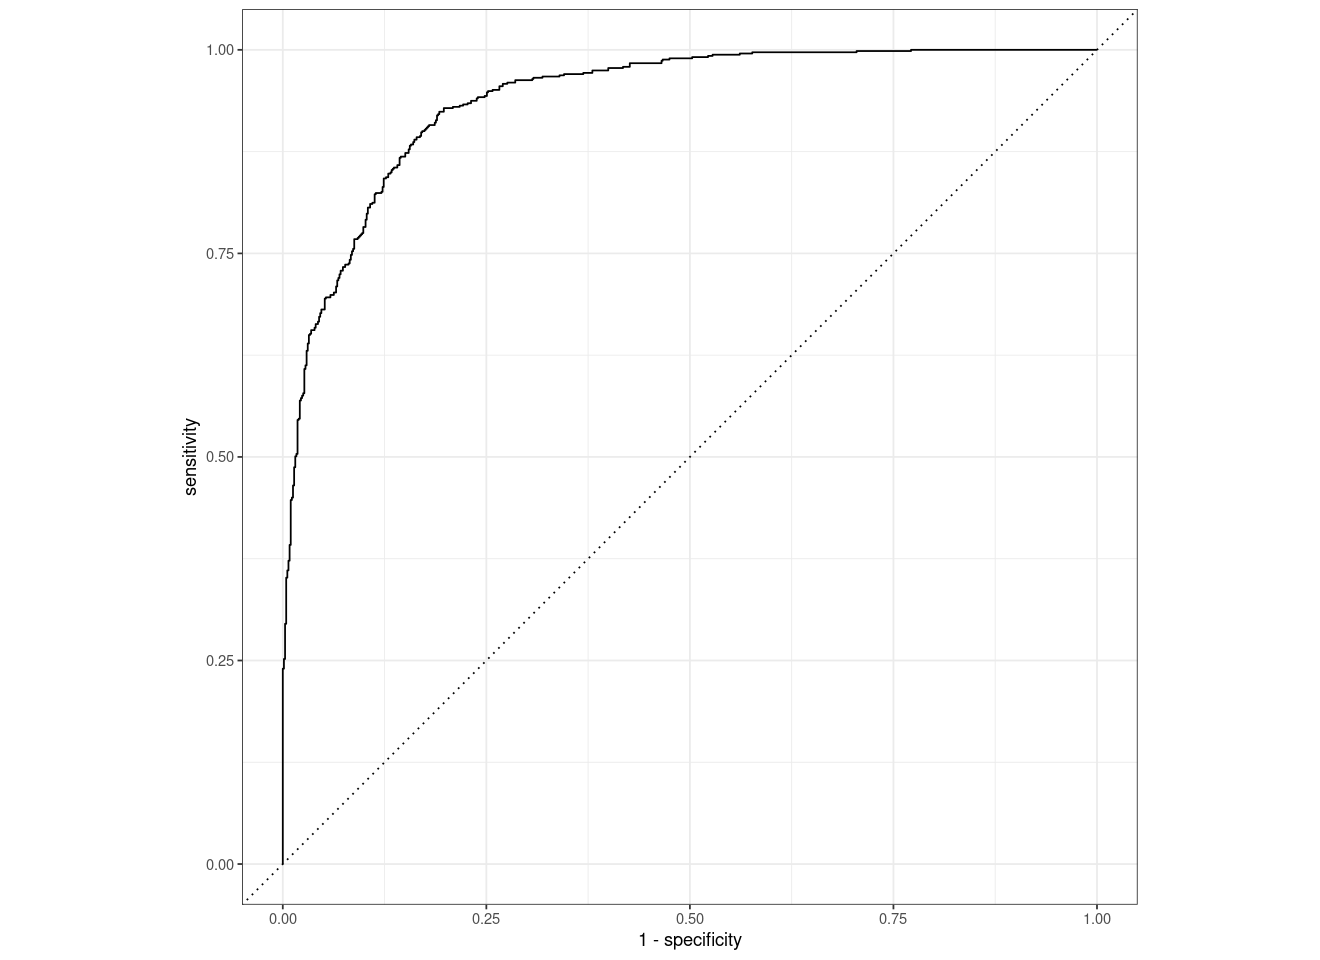

In [18]:
# LDA Model Performance Evaluation
lda_results <- predict(lda_fit, test_data, type = "prob") %>%
  bind_cols(test_data)

lda_roc <- roc_curve(lda_results, truth = customer_status, .pred_closed_account)
lda_auc <- roc_auc(lda_results, truth = customer_status, .pred_closed_account)

# Plotting ROC curve
autoplot(lda_roc)
print(paste("LDA AUC:", lda_auc$.estimate))

## Model 2 Training

In [20]:
# QDA Model Specification
qda_spec <- discrim_quad() %>%
  set_engine("MASS") %>%
  set_mode("classification")

qda_wf <- workflow() %>%
  add_recipe(recipe) %>%
  add_model(qda_spec)

# Fitting the QDA model
qda_fit <- fit(qda_wf, data = train_data)


## Model 2 Performance Evaluation

[1] "QDA AUC: 0.946309295982797"


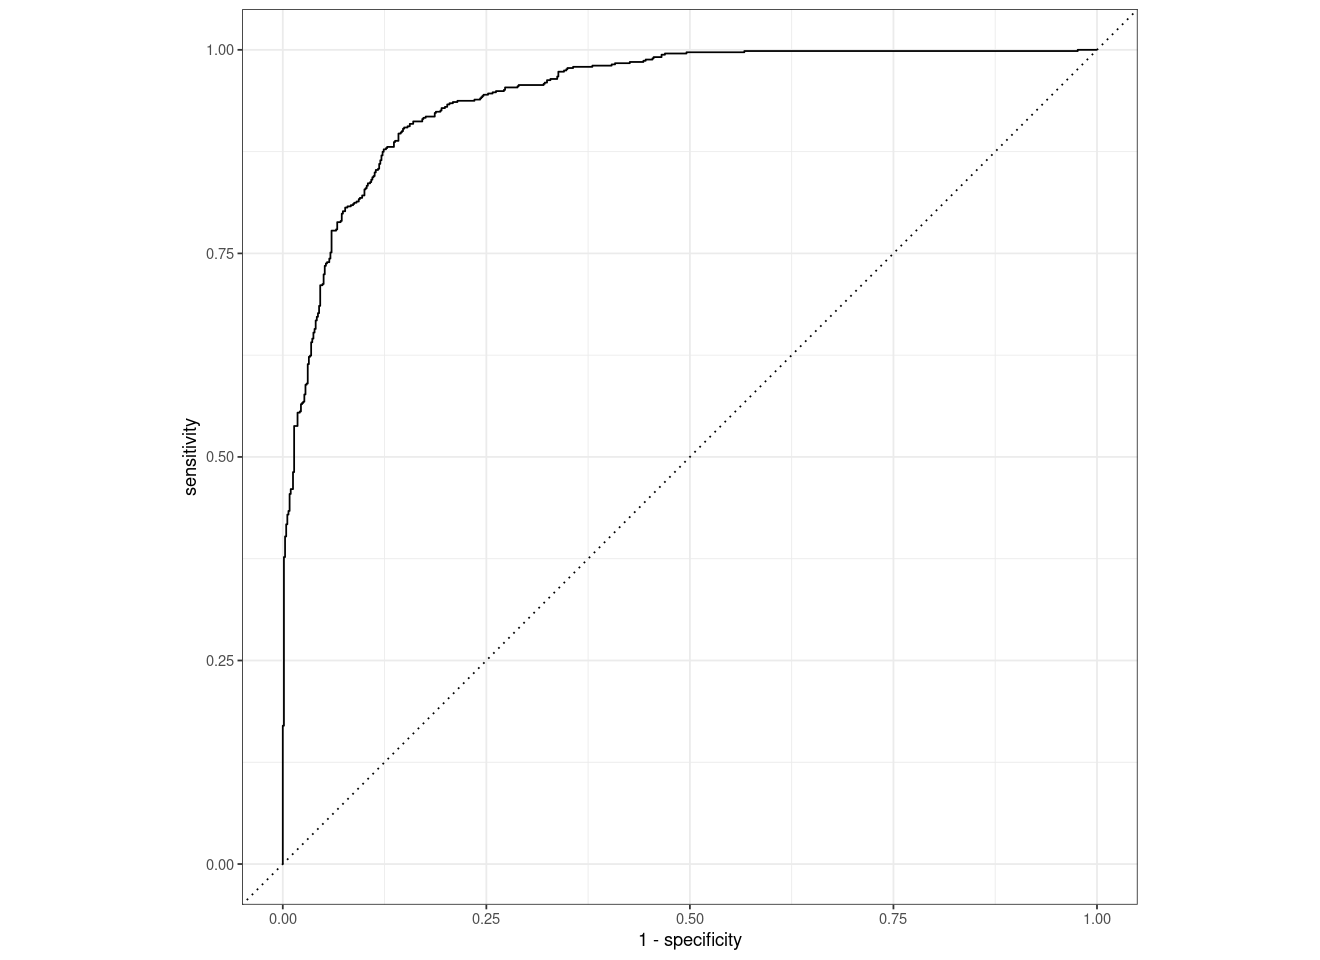

In [22]:
# QDA Model Performance Evaluation
qda_results <- predict(qda_fit, test_data, type = "prob") %>%
  bind_cols(test_data)

qda_roc <- roc_curve(qda_results, truth = customer_status, .pred_closed_account)
qda_auc <- roc_auc(qda_results, truth = customer_status, .pred_closed_account)

autoplot(qda_roc)
print(paste("QDA AUC:", qda_auc$.estimate))

## Model 3 Training

In [23]:
#Fitting the Decision tree model with the workflow
library(tidymodels)
library(dials)

# Decision Tree Model Specification with tuning parameters
dt_mod_tune <- decision_tree(cost_complexity = tune(),
                               tree_depth = tune(),
                               min_n = tune()) %>%
  set_engine("rpart") %>%
  set_mode("classification")


# Set up cross-validation
set.seed(123)
cv_folds <- vfold_cv(train_data, v = 5,  strata = customer_status)
model_metrics = metric_set(accuracy, roc_auc, sens, spec)

# setting up the workflow
tree_wf <- workflow() %>%
  add_model(dt_mod_tune) %>%
  add_recipe(recipe)
tree_wf


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: decision_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Decision Tree Model Specification (classification)

Main Arguments:
  cost_complexity = tune()
  tree_depth = tune()
  min_n = tune()

Computational engine: rpart 


In [24]:
#Performing Grid Search
dt_grid <- grid_random(parameters(dt_mod_tune),
                       size = 5)

#Performing Hyperparameter tuning
dt_tuning <- tree_wf %>% 
  tune_grid(resamples = cv_folds,
            grid = dt_grid,
            metrics = model_metrics)

# Print results
dt_tuning %>% 
  collect_metrics

Warning message:
“`parameters.model_spec()` was deprecated in tune 0.1.6.9003.
ℹ Please use `hardhat::extract_parameter_set_dials()` instead.”


cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
2.104679e-09,1,15,accuracy,binary,0.7455266,5,0.002797286,Preprocessor1_Model1
2.104679e-09,1,15,roc_auc,binary,0.7561702,5,0.003873974,Preprocessor1_Model1
2.104679e-09,1,15,sens,binary,0.8431233,5,0.020268853,Preprocessor1_Model1
2.104679e-09,1,15,spec,binary,0.6692171,5,0.014785085,Preprocessor1_Model1
9.450409e-06,5,33,accuracy,binary,0.8937427,5,0.007965282,Preprocessor1_Model2
9.450409e-06,5,33,roc_auc,binary,0.9430131,5,0.005365903,Preprocessor1_Model2
9.450409e-06,5,33,sens,binary,0.8704942,5,0.013691607,Preprocessor1_Model2
9.450409e-06,5,33,spec,binary,0.9119335,5,0.008720780,Preprocessor1_Model2
1.767897e-10,11,38,accuracy,binary,0.9098068,5,0.008157997,Preprocessor1_Model3


## Model 3 Performance Evaluation

In [25]:
#Selecting the best model out of all folds

dt_tuning %>% 
  show_best(metric = 'roc_auc', n = 5)

# Selecting based on best performance
best_dt_model <- dt_tuning %>% 
# Choosing the best model based on roc_auc
  select_best(metric = 'roc_auc')

# Finalize the workflow
final_loans_wkfl <- tree_wf %>% 
  finalize_workflow(best_dt_model)

final_loans_wkfl

cost_complexity,tree_depth,min_n,.metric,.estimator,mean,n,std_err,.config
<dbl>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1.767897e-10,11,38,roc_auc,binary,0.9478395,5,0.005483211,Preprocessor1_Model3
1.757255e-03,14,31,roc_auc,binary,0.9445124,5,0.006329988,Preprocessor1_Model4
9.450409e-06,5,33,roc_auc,binary,0.9430131,5,0.005365903,Preprocessor1_Model2
3.403163e-03,3,36,roc_auc,binary,0.9072328,5,0.004876420,Preprocessor1_Model5
2.104679e-09,1,15,roc_auc,binary,0.7561702,5,0.003873974,Preprocessor1_Model1


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: decision_tree()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────
Decision Tree Model Specification (classification)

Main Arguments:
  cost_complexity = 1.76789701192556e-10
  tree_depth = 11
  min_n = 38

Computational engine: rpart 


.metric,.estimator,.estimate,.config
<chr>,<chr>,<dbl>,<chr>
accuracy,binary,0.8977682,Preprocessor1_Model1
roc_auc,binary,0.9427786,Preprocessor1_Model1


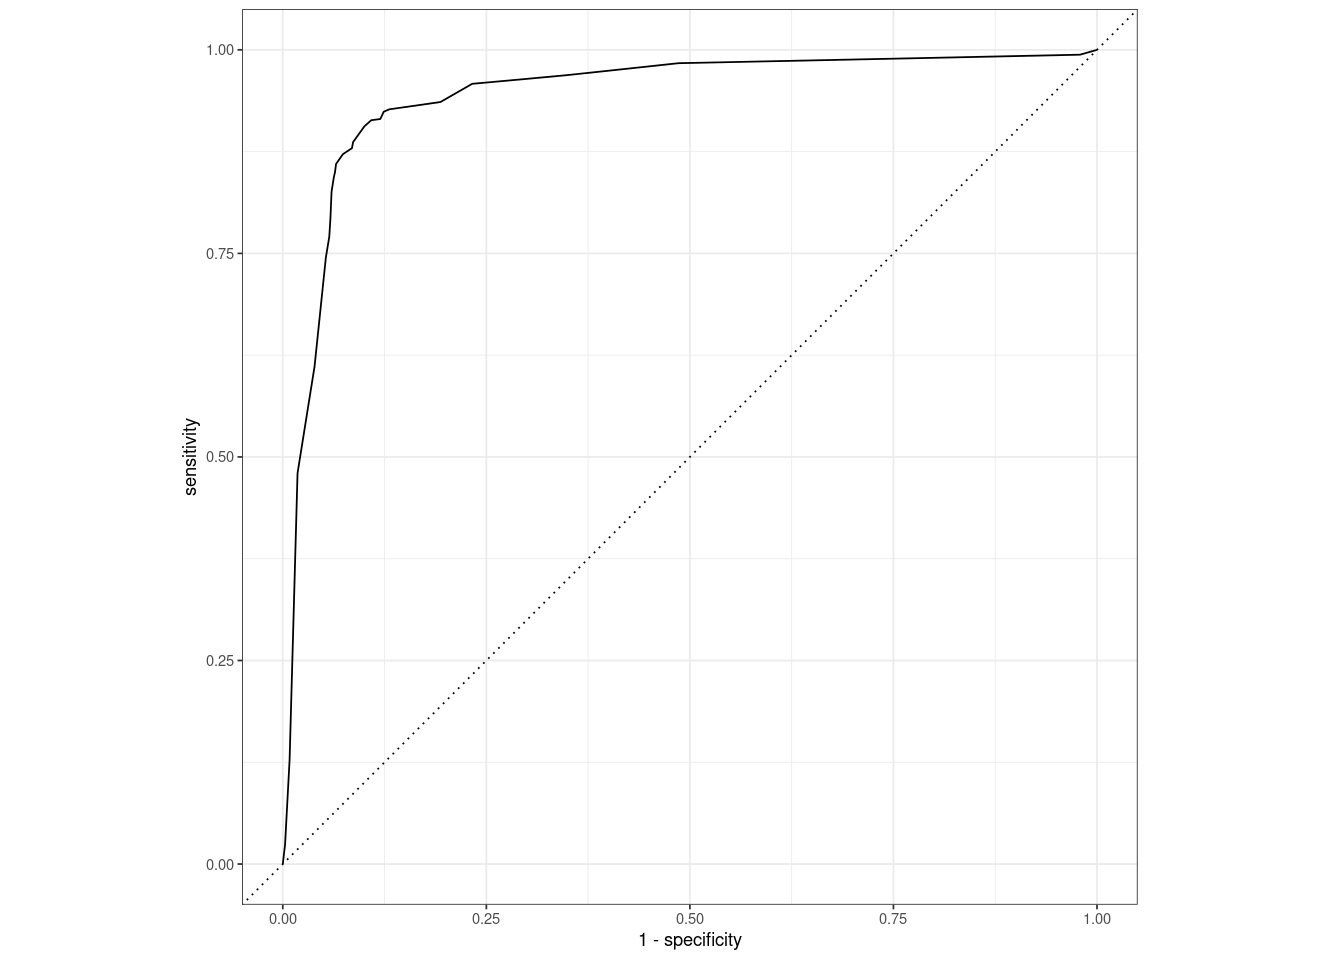

In [26]:
#Doing the ROC Plot
loans_final_fit <- final_loans_wkfl %>% 
  last_fit(split = data_split)

# View performance metrics
loans_final_fit %>% 
  collect_metrics()

# Creating an ROC curve
loans_final_fit %>% 
  # Collectingpredictions
  collect_predictions() %>%
  # Calculating ROC curve metrics
  roc_curve(truth = customer_status, .pred_closed_account) %>%
  # Plotting the ROC curve
  autoplot()

# Executive Summary (25 Points)

Write an executive summary of your overall findings and recommendations to the executives at the bank. Think of this section as your closing remarks of a presentation, where you summarize your key findings, model performance, and make recommendations to improve customer retention and service at the ban

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
- This section is meant to **establish the need for your recommendations** 
        in the following section

3. Your “best” classification model and an analysis of its performance 
	- In this section you should talk about the expected error of your model on future data
	 	- To estimate future performance, you can use your model performance results on the **test data**
    - You should discuss at least one performance metric, such as an F1, sensitivity, specificity, or ROC AUC for your model. However, you must explain the results in an **intuitive, non-technical manner**. Your audience in this case are executives at a telecommunications company with limited knowledge of machine learning.

4.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add your executive summary in the text block below**

## Introduction

One of the biggest challenges facing a major U.S. bank in the ever changing financial services sector is the growing number of credit card account cancellations by customers. This problem not only erodes the bank's customer base but also has a substantial effect on its income streams, especially the ones that come from interest charges on credit card balances that are carried over. Understanding how serious this problem is, the bank has launched an extensive analytical research with two goals in mind: investigating the causes of these account closures and utilizing machine learning technology to forecast possible cancellations in the future. The main goal of the research is to extract useful insights and prediction indications by analyzing the credit_card_df dataset, which contains a plethora of customer data.This is a critical step in ensuring the bank's operational stability and financial soundness, not just a data research project. To counteract this trend, the bank intends to proactively identify at-risk accounts and get insight into the factors that influence customers' decisions to cancel. Thus, the bank's larger strategy to increase client retention, maximize revenue from credit products, and gain a competitive edge in the market is anchored by this project.


## Key Findings

In our exploratory data analysis, several intriguing findings have emerged, shedding light on crucial aspects of customer behavior and account management within our credit card business. Firstly, a discernible relationship between customer age and account closure has been established, with closed accounts showing a slightly higher average age of 46.2 years compared to open accounts at 45.8 years. Secondly, income levels significantly impact account retention, as evidenced by higher-income customers displaying a propensity to keep their accounts open, with an average income of approximately $62,500$ compared to approximately $50,367 for closed accounts. Moreover, the type of credit card wielded by customers also plays a pivotal role, with gold cardholders exhibiting a notably lower closure rate (12.3%) compared to blue cardholders (23.6%). Additionally, educational attainment emerges as a determinant factor, with customers holding master's degrees exhibiting the highest closure rate at 20.6%, contrasting with an associate's degree holder closure rate of 16.7%. Finally, the disparity in average age between customers who close their accounts (44.8 years) and those who maintain them (42.7 years) underscores age as a contributing factor in account management decisions. These findings underscore the necessity for tailored strategies aimed at retaining high-income customers, addressing age-related preferences, and optimizing credit card offerings based on card type and educational background to bolster customer retention and satisfaction, thereby fostering sustained business growth and profitability. Based on the insightful findings from our exploratory data analysis, we recommend a multifaceted approach to optimize customer retention and bolster business performance. Tailored marketing strategies should be devised to target older demographics, acknowledging their propensity to close accounts, while income-driven incentives such as personalized rewards and enhanced customer support should be introduced to retain high-income clientele. Product diversification and customization efforts should focus on introducing premium card tiers for affluent customers, while maintaining flexibility and affordability across income brackets. Educational outreach initiatives aimed at improving financial literacy among customers with lower educational backgrounds can enhance their confidence in managing credit and foster brand loyalty. Continuous monitoring and analysis of account closure trends are paramount, enabling proactive adjustments of strategies to ensure our offerings remain aligned with evolving customer preferences and market dynamics.


## Modeling Results

Based on the provided AUC scores, the Quadratic Discriminant Analysis (QDA) model appears to be the best classification model among the three, with an AUC score of 0.9463. This indicates that the QDA model has the highest discriminatory power in distinguishing between positive and negative classes, surpassing both Linear Discriminant Analysis (LDA) and the Decision Tree model. Analyzing its performance further, the QDA model demonstrates superior ability in correctly classifying instances and minimizing false positives and false negatives compared to its counterparts. However, it's essential to understand that even the best-performing model, like QDA in this case, may not achieve perfect accuracy when applied to future data. Future performance estimation suggests that while the QDA model has shown promising results on our test data, there's still a margin for error when predicting outcomes on unseen data. For instance, in real-world scenarios, unforeseen variables or shifts in customer behavior could affect the model's performance. Therefore, while QDA presents a robust solution for classification tasks in telecommunications, it's crucial to approach its predictions with cautious optimism, acknowledging the inherent uncertainty and potential limitations when extrapolating its performance to future data.In a nutshell, these models provide a powerful tool for understanding and predicting customer account closure, which can help the company take proactive steps to improve customer retention. But like any tool, they need to be used wisely and maintained properly to provide the most value.


## Recommendations

Based on the comprehensive insights derived from both exploratory data analysis (EDA) and machine learning (ML) models, we recommend a targeted and proactive approach to optimize customer retention and bolster business performance for the credit card company. Leveraging EDA findings, tailored marketing strategies should be devised, targeting older demographics who exhibit a higher propensity to close accounts, while income-driven incentives should be introduced to retain high-income clientele, supported by the observed correlation between income levels and account retention. Additionally, product diversification and customization efforts, informed by EDA results regarding credit card type preferences, should focus on introducing premium tiers for affluent customers, while educational outreach initiatives aimed at improving financial literacy among customers with lower educational backgrounds can foster brand loyalty. Moreover, incorporating ML insights, particularly from the superior Quadratic Discriminant Analysis (QDA) model, can facilitate proactive identification of customers at risk of churn, enabling targeted retention initiatives to mitigate attrition rates and strengthen customer relationships. By aligning strategies with both EDA and ML findings, the company can enhance customer satisfaction, drive revenue growth, and maintain a competitive edge in the dynamic telecommunications industry.